# **Data cleaning means fixing messy data so it’s accurate, complete, and ready for analysis. It’s important because clean data leads to better results and insights**.

1 : Fill or Remove Missing Data

2 : handling cat data

3 : Handle Outliers[box plot]

4 : Make Data Consistent: Standardize things

5 : Remove Duplicates

6: Correct Errors: Fix mistakes like typos or wrong formats.



In [ ]:
import pandas as pd
df =pd.read_csv('loan.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# handling null values

In [ ]:
df.shape

(614, 13)

In [ ]:
#per of null val
(df.isnull().sum()/df.shape[0])*100    #df.shape[0] is no of rows

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
df.isnull().sum().sum()   #total null vals

149

In [ ]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100
#total null val per %

1.8667000751691305

In [ ]:
df.notnull().sum().sum()

7833

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

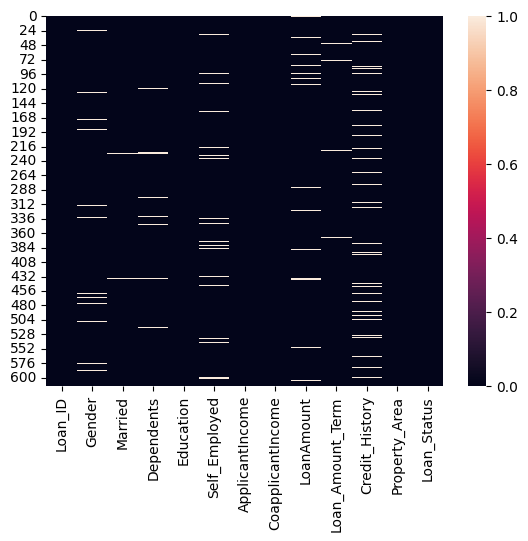

In [ ]:
sns.heatmap(df.isnull())

Handling null (or missing) values in a dataset is a key step in data cleaning. Here are some common ways to handle them:

Remove Null Values:

If there are only a few missing values, you can delete those rows or columns.
Use dropna() in Pandas to remove rows or columns with null values.
python
Copy code
# Drop rows with any null values
df.dropna(axis=0, inplace=True)

# Drop columns with any null values
df.dropna(axis=1, inplace=True)
Fill Null Values with Mean, Median, or Mode:

For numerical columns, fill nulls with the mean, median, or mode of the column.
For categorical data, fill with the most frequent value (mode).
python
Copy code
# Fill with mean
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Fill with median
df['column_name'].fillna(df['column_name'].median(), inplace=True)

# Fill with mode (most frequent value)
df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)
Fill with Forward/Backward Fill:

Use previous or next values in the column to fill missing data (useful for time series data).
python
Copy code
# Forward fill (previous value)
df.fillna(method='ffill', inplace=True)

# Backward fill (next value)
df.fillna(method='bfill', inplace=True)
Imputation Using Algorithms:

For more complex cases, use algorithms to predict and fill missing values based on patterns in the data (e.g., K-Nearest Neighbors, regression).
Assign a Default Value:

Fill with a constant value (e.g., 0 for numerical data, "Unknown" for categorical data).
python
Copy code
df['column_name'].fillna(0, inplace=True)  # For numerical data
df['column_name'].fillna('Unknown', inplace=True)  # For categorical data
The best approach depends on the data and context of your analysis.






You said:
why we are using inplace = true
ChatGPT said:
ChatGPT
Using inplace=True in pandas functions like dropna(), fillna(), or drop() means that the changes are made directly to the original DataFrame instead of creating a modified copy. It modifies the data in place without needing to reassign the DataFrame to a new variable.

Benefits of Using inplace=True
Saves Memory: By avoiding the creation of a copy, it reduces memory usage, which can be important for large datasets.
Simplifies Code: You don’t need to reassign the result to the original DataFrame, keeping the code cleaner.
python
Copy code
# With inplace=True
df.dropna(inplace=True)

# Without inplace=True
df = df.dropna()
When Not to Use inplace=True
If you want to keep the original DataFrame unchanged for reference or future steps, you may choose to avoid inplace=True.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# for category data

In [ ]:
df.select_dtypes(include="object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].value_counts())


Loan_ID
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [ ]:
for i in df.select_dtypes(include="object").columns:
  df[i].fillna(df[i].mode()[0],inplace=True)


<ipython-input-19-0b98be5c6362>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.select_dtypes(include="number").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i].fillna(df[i].mean(),inplace=True)

<ipython-input-22-6d7073674a5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# **handling with cat data**

In data preprocessing, dummy variables (also known as one-hot encoding) are used to convert categorical data into numerical format so that machine learning models can interpret **it**

Steps to Create Dummy Variables
Use pd.get_dummies():

This function automatically creates dummy variables for each category in a column. For each unique category, it creates a new column with binary values (0 or 1).
drop_first=True can be used to avoid the "dummy variable trap" (where one column is redundant and can cause multicollinearity in some models).
python
Copy code
# Creating dummies for a single column
df_dummies = pd.get_dummies(df['column_name'], drop_first=True)

# Creating dummies for multiple columns
df = pd.get_dummies(df, columns=['col1', 'col2'], drop_first=True)**bold text**

In [ ]:
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

drop_first = True ?
It drops the first category for each column you are creating dummies for.

When you have multiple dummy variables for a single column, one of them becomes unnecessary because it can be derived from the others. This can cause issues like multicollinearity in regression models.

In [ ]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,LP001003,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,LP001005,3000,0.0,66.000000,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,LP001006,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,LP001008,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [ ]:
df.shape

(614, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education_Not Graduate   614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

# output has "Yes" or "No" values instead of 0 or 1 after using pd.get_dummies, it's likely that your original data contained "Yes" and "No" strings as the categorical values in those **columns**

In [ ]:
df.replace({True:1,False:0},inplace=True)

<ipython-input-28-9c8a72149c64>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [ ]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


#METHOD 2 Label endcoding(NOMINAL DATA)
Label Encoding is a method to convert categorical data (text or labels) into numerical values. It assigns a unique number to each category in a column.


For example, for the column ['Red', 'Blue', 'Green'], it will encode:
Red → 0
Blue → 1
Green → 2
The result is a single numerical column.

When to Use:
When the categorical variable is nominal (e.g.,cat,cow,dog) where the order matters.

Use One-Hot Encoding instead if the variable is nominal (no natural order).

In [ ]:
df2 = pd.DataFrame({'color':['red','blue','green','green','red','blue']})
df2

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['rank']=le.fit_transform(df2['color'])

In [ ]:
df2

,color,rank
0,red,2
1,blue,0
2,green,1
3,green,1
4,red,2
5,blue,0


In [ ]:
import pandas as pd
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
le.fit(df['Property_Area'])

LabelEncoder()

In [ ]:
df['Property_Area'] = le.transform(df['Property_Area'])

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,Y


In [ ]:
df = pd.get_dummies(df,columns=['Gender'])
df.replace({True:1,False:0},inplace =True)

<ipython-input-38-04f086dd525f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace =True)


In [ ]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,0,1


# **Ordinal Encoding
ordinal encoding is a method to convert categories into numbers while preserving their natural order or hierarchy.**

How It Works:
Each category is assigned a unique number based on its rank or position.

For example, for ['Low', 'Medium', 'High']:
Low → 0
Medium → 1
High → 2
The result is a single numerical column with values that reflect the order.


Aspect	Label Encoding	Ordinal Encoding
Purpose	Assigns unique numbers to each category.	Assigns numbers to categories based on order or rank.
Order in Data	No assumption of order in categories.	Assumes a meaningful order or ranking exists.
Usage	For categorical data without a natural order.	For categorical data with a natural order.
Example Categories	['Dog', 'Cat', 'Mouse']	['Low', 'Medium', 'High']
Output	Categories get arbitrary numbers:	Categories are ranked numerically:
Dog → 0, Cat → 1, Mouse → 2.	Low → 0, Medium → 1, High → 2.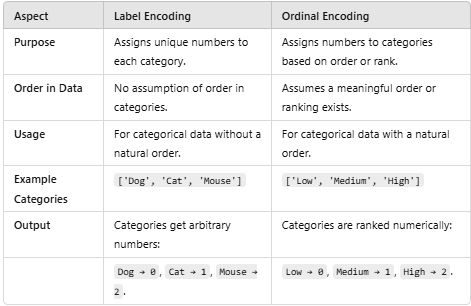

Use fit() on the training data to learn parameters (like scaling factors or encoding mappings).
Use transform() to apply these learned parameters to both the training data and ***any new data*** to ensure consistency in transformations.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder as oe

In [ ]:
import pandas as pd
df=pd.read_csv("loan.csv")

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
order = ['Rural','Semiurban','Urban']

In [ ]:
encoded = oe(categories=[order])

In [ ]:
encoded.fit(df[['Property_Area']])
df['Property_Area'] = encoded.transform(df[['Property_Area']])

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2.0,Y


In [ ]:
df['Property_Area'].unique()

array([2., 0., 1.])


# What is an Outlier?
An outlier is a data point that significantly differs from other observations in a dataset. It can be much higher or lower than the majority of the data and may be caused by:

Measurement errors
Experimental errors
Variability in the data
Rare events
Outliers can distort statistical analyses and machine learning models, so it is important to identify and handle them appropriately.

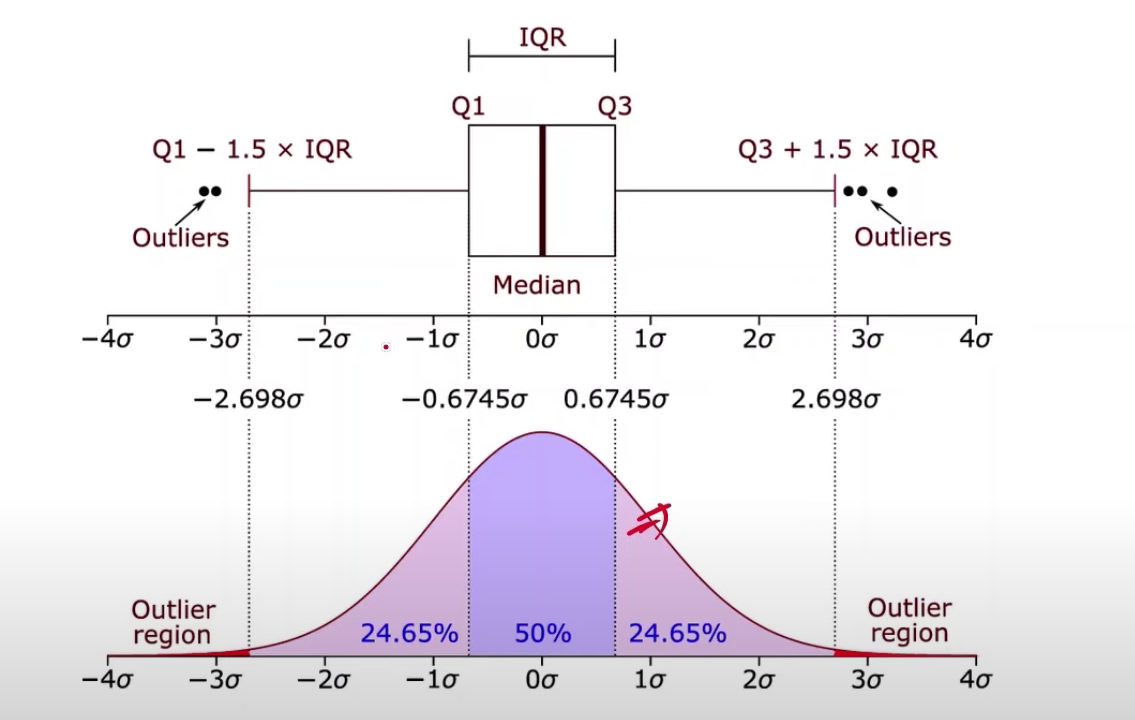

# How to Detect Outliers?
Here are some common methods for detecting outliers:

Using Summary Statistics:

Look at mean, median, and standard deviation. Outliers often cause a large difference between the mean and the median.
Box Plot (IQR Method):

Visualize the data with a box plot.
An observation is considered an outlier if:
Outlier
<
𝑄
1
−
1.5
×
IQR
or
Outlier
>
𝑄
3
+
1.5
×
IQR
Outlier<Q1−1.5×IQRorOutlier>Q3+1.5×IQR
where IQR =
𝑄
3
−
𝑄
1
Q3−Q1.

<Axes: xlabel='ApplicantIncome'>

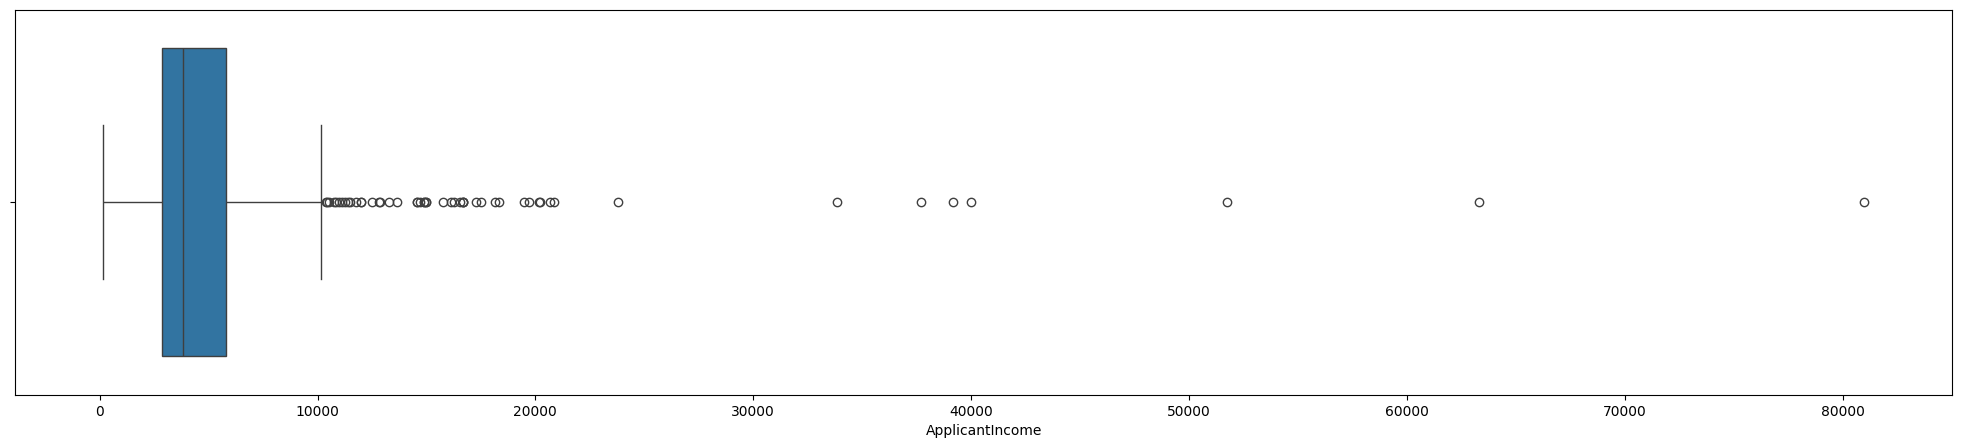

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,5))
sns.boxplot(x = 'ApplicantIncome',data=df)

<Axes: xlabel='CoapplicantIncome'>

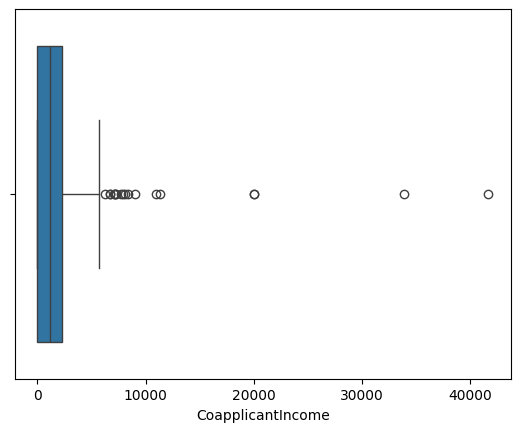

In [ ]:
sns.boxplot(x='CoapplicantIncome',data=df)

<ipython-input-51-3de0305dddc9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])  #distribution plot


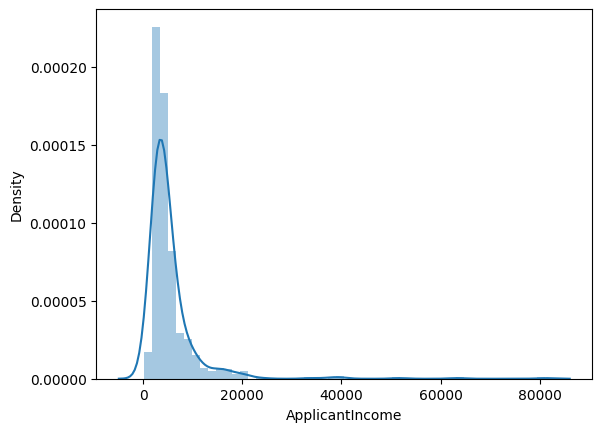

In [ ]:
sns.distplot(df['ApplicantIncome'])  #distribution plot
plt.show()

In [ ]:
import numpy as np
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

<ipython-input-53-93ee1ce8a241>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i].fillna(df[i].mean(),inplace=True)

<ipython-input-55-6d7073674a5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
num_data = df.select_dtypes(include="number")

In [ ]:
num_data.mean()

,0
ApplicantIncome,5403.459283
CoapplicantIncome,1621.245798
LoanAmount,146.412162
Loan_Amount_Term,342.000000
Credit_History,0.842199
Property_Area,1.037459


In [ ]:
num_data.median()

,0
ApplicantIncome,3812.5
CoapplicantIncome,1188.5
LoanAmount,129.0
Loan_Amount_Term,360.0
Credit_History,1.0
Property_Area,1.0


In [ ]:
num_data.std()

,0
ApplicantIncome,6109.041673
CoapplicantIncome,2926.248369
LoanAmount,84.037468
Loan_Amount_Term,64.372489
Credit_History,0.349681
Property_Area,0.787482


Look at mean, median,standard deviation  cause a large difference between the mean and the median.

#method 1

The IQR Method (Interquartile Range) is a statistical approach to detect and handle outliers in a dataset.

When to Use: Use the IQR method when your data is not normally distributed, and you want to handle extreme values that may affect your analysis.

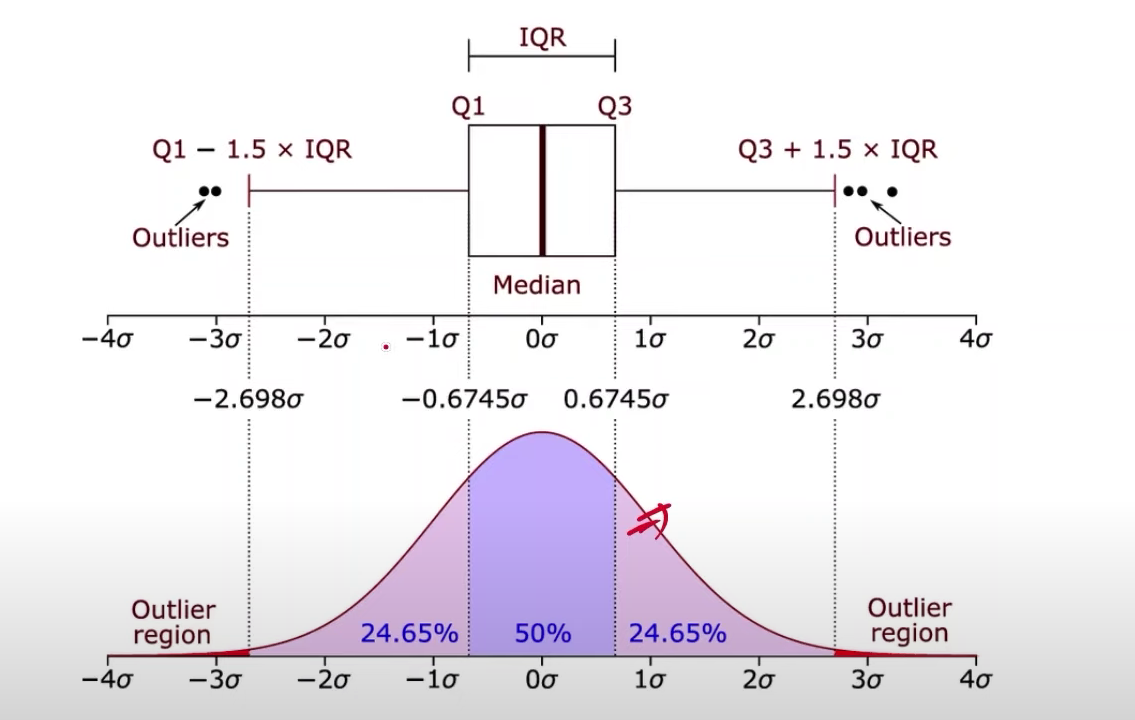

# Steps to Use the IQR Method:
Calculate the IQR:
IQR = Q3 - Q1, where:
Q1 (1st quartile) is the 25th percentile.
Q3 (3rd quartile) is the 75th percentile.

Determine the Outlier Bounds:
Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR

Identify Outliers:
Any data point below the lower bound or above the upper bound is considered an outlier.
Handle Outliers:
Options include:
Removing outliers.
Replacing outliers with a specific value (e.g., median or mean).
Keeping them for analysis if they are valid.

In [ ]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q1



0.0

In [ ]:
q3 = df['CoapplicantIncome'].quantile(0.75)
q3

2297.25

In [ ]:
iqr = q3-q1
iqr

2297.25

In [ ]:
lower_bound = q1 -(1.5*iqr)
lower_bound

-3445.875

In [ ]:
upper_bound = q3+1.5*iqr
upper_bound

5743.125

In [ ]:
new_data = df[df['CoapplicantIncome']<=upper_bound]

<Axes: xlabel='CoapplicantIncome'>

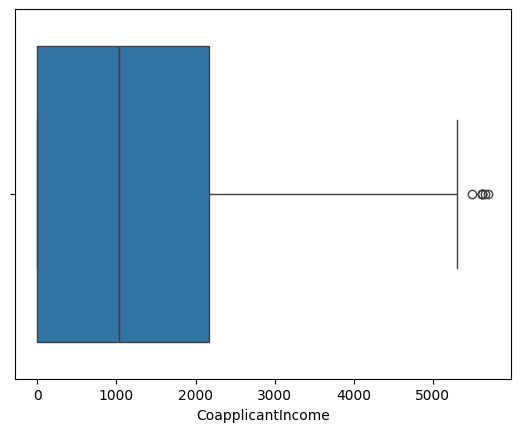

In [ ]:
sns.boxplot(x='CoapplicantIncome',data=new_data)

here we are not dealing with lower bound bec the the lower bound value is negtive and our data set doesnt contain any negtive value

In [ ]:
new_data.shape

(596, 13)

#method 2
The Z-Score Method is another approach to detect and handle outliers. It identifies outliers by measuring how many standard deviations a data point is from the mean.

Steps to Use the Z-Score Method:
Calculate the Mean and Standard Deviation of the dataset.
Compute the Z-Score for each data point using the formula:
𝑍
=
(
𝑋
−
mean
)
std
Z=
std
(X−mean)
​

Where:
𝑋
X = value of the data point.
mean
mean = average of the dataset.
std
std = standard deviation of the dataset.
Identify Outliers:
If the absolute value of the Z-score (
∣
𝑍
∣
∣Z∣) is greater than a chosen threshold (commonly 3), the data point is considered an outlier.
Handle Outliers:
Remove, replace, or analyze them further, depending on the context.


To determine whether your data is normally distributed, you can use visualizations, statistical tests, or summary statistics. Here's how:

1. Visual Methods
a) Histogram
Plot a histogram of your data.
A normal distribution should resemble a symmetric bell-shaped curve.
python
Copy code
import matplotlib.pyplot as plt

plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.title('Histogram')
plt.show()

(array([281.,  25.,  65.,  88.,  47.,  32.,  20.,  17.,  11.,  10.]),
 array([   0. ,  570.1, 1140.2, 1710.3, 2280.4, 2850.5, 3420.6, 3990.7,
        4560.8, 5130.9, 5701. ]),
 <BarContainer object of 10 artists>)

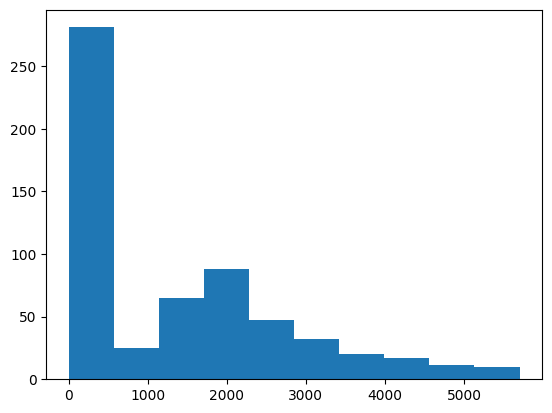

In [ ]:
 plt.hist(new_data['CoapplicantIncome'])


In [ ]:
z_score  = df['CoapplicantIncome'] - df['CoapplicantIncome'].mean()/(df['CoapplicantIncome'].std())

In [ ]:
z_score<3

,CoapplicantIncome
0,True
1,False
2,True
3,False
4,True
...,...
609,True
610,True
611,False
612,True


In [ ]:
df['z_score'] = z_score
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,2.0,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,0.0,N,1507.445964
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,2.0,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,2.0,Y,2357.445964
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,2.0,Y,-0.554036


In [ ]:
df = df[df["z_score"]<3]

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,2.0,Y,-0.554036
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,2.0,Y,-0.554036
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,2.0,Y,-0.554036
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.000000,360.0,1.000000,2.0,Y,-0.554036
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,0.842199,2.0,Y,-0.554036


In [ ]:
df.shape

(273, 14)

here we can see the size of the data is reduced hence our outliers are removed

as our data is normally distributed hence we lost lot of data because of z score method then compared to IQR

In [ ]:
new_data.shape

(596, 13)

# feature scalling

Feature scaling is a technique used to standardize or normalize the range of independent variables (features) in a dataset. It ensures that all features contribute equally to the model and improves the performance of machine learning algorithms, especially those sensitive to the scale of data.

Why is Feature Scaling Needed?
Equal Importance: Algorithms like Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Gradient Descent are sensitive to feature magnitudes. Features with larger ranges might dominate others.
Faster Convergence: Scaling speeds up the convergence of optimization algorithms like Gradient Descent.
Distance-Based Algorithms: Models that rely on distance metrics (e.g., Euclidean distance) require scaled data for accurate results.
Consistency: Scaling ensures features are comparable and don't skew results due to different units (e.g., age vs. income).
Common Feature Scaling Techniques
1. Normalization
Scales the data between 0 and 1 (or -1 and 1 for centered data).
Formula:
𝑥
′
=
𝑥
−
𝑥
min
𝑥
max
−
𝑥
min
x
′
 =
x
max
​
 −x
min
​

x−x
min
​

​

When to use: Useful when the distribution of the data is not Gaussian and you need values in a bounded range.
Method in Python:
python
Copy code
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
2. Standardization
Scales data to have a mean of 0 and a standard deviation of 1.
Formula:
𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
​

where
𝜇
μ is the mean, and
𝜎
σ is the standard deviation.
When to use: Preferred for algorithms that assume Gaussian distribution (e.g., logistic regression, SVM).
Method in Python:
python
Copy code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
3. Robust Scaling
Uses the median and interquartile range, making it robust to outliers.
Formula:
𝑥
′
=
𝑥
−
median
IQR
x
′
 =
IQR
x−median
​

When to use: Effective when data contains outliers.
Method in Python:
python
Copy code
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)
Which Algorithms Need Scaling?
Scaling Required:
SVM
KNN
Principal Component Analysis (PCA)
Gradient-based algorithms (Logistic Regression, Neural Networks)
Scaling Not Always Required:
Tree-based models (Decision Trees, Random Forests, Gradient Boosted Trees)

You use fit_transform() on training data because it calculates the scaling parameters (like mean and standard deviation for standardization or min and max for normalization) based on the training data and then applies the transformation.

When working with the test data, you only use transform() because you want to apply the same scaling that was calculated from the training data. This ensures consistency and avoids "leaking" information from the test set into the training process, which could lead to overfitting and unrealistic results.

In simple terms:
fit_transform(): Learn the scaling from training data and apply it.
transform(): Use the learned scaling on new data (like test data) without changing the learned parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[['ApplicantIncome']])

StandardScaler()

In [ ]:
df['ApplicantIncome'] = sc.transform(df[['ApplicantIncome']])

<ipython-input-92-3de03a52b926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApplicantIncome'] = sc.transform(df[['ApplicantIncome']])


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,-0.162274,0.0,146.412162,360.0,1.000000,2.0,Y,-0.554036
2,LP001005,Male,Yes,0,Graduate,Yes,-0.513526,0.0,66.000000,360.0,1.000000,2.0,Y,-0.554036
4,LP001008,Male,No,0,Graduate,No,-0.143657,0.0,141.000000,360.0,1.000000,2.0,Y,-0.554036
15,LP001032,Male,No,0,Graduate,No,-0.273111,0.0,125.000000,360.0,1.000000,2.0,Y,-0.554036
16,LP001034,Male,No,1,Not Graduate,No,-0.440045,0.0,100.000000,240.0,0.842199,2.0,Y,-0.554036


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score
count,2.730000e+02,273.0,273.000000,273.000000,273.000000,273.000000,2.730000e+02
mean,1.789370e-17,0.0,145.106029,340.461538,0.838834,1.084249,-5.540356e-01
std,1.001837e+00,0.0,100.068705,66.783502,0.355535,0.779004,2.224524e-15
min,-7.056113e-01,0.0,9.000000,36.000000,0.000000,0.000000,-5.540356e-01
25%,-4.460866e-01,0.0,93.000000,360.000000,1.000000,0.000000,-5.540356e-01
50%,-2.811251e-01,0.0,124.000000,360.000000,1.000000,1.000000,-5.540356e-01
75%,6.100352e-02,0.0,160.000000,360.000000,1.000000,2.000000,-5.540356e-01
max,9.103063e+00,0.0,700.000000,480.000000,1.000000,2.000000,-5.540356e-01


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
mms.fit(df[['CoapplicantIncome']])


MinMaxScaler()

In [ ]:
df['CoapplicantIncome'] = mms.transform(df[['CoapplicantIncome']])

<ipython-input-101-973b0aeb6612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome'] = mms.transform(df[['CoapplicantIncome']])


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,-0.162274,0.0,146.412162,360.0,1.000000,2.0,Y,-0.554036
2,LP001005,Male,Yes,0,Graduate,Yes,-0.513526,0.0,66.000000,360.0,1.000000,2.0,Y,-0.554036
4,LP001008,Male,No,0,Graduate,No,-0.143657,0.0,141.000000,360.0,1.000000,2.0,Y,-0.554036
15,LP001032,Male,No,0,Graduate,No,-0.273111,0.0,125.000000,360.0,1.000000,2.0,Y,-0.554036
16,LP001034,Male,No,1,Not Graduate,No,-0.440045,0.0,100.000000,240.0,0.842199,2.0,Y,-0.554036


here coapplicantIncome is showing zero mostly is bec of we have removed the outliers for better understanding re import the data set and understand

# 5 : handling duplicates

Handling duplicate data is an essential step in data cleaning to ensure accuracy and avoid bias in your analysis. Here’s how to handle it:

1. Identify Duplicates
Use .duplicated() to check for duplicate rows.
python
Copy code
duplicates = df.duplicated()
print(df[duplicates])
To count duplicates:
python
Copy code
print(df.duplicated().sum())
2. Remove Duplicates
Remove all duplicate rows while keeping the first occurrence:
python
Copy code
df = df.drop_duplicates()
If you want to modify the original DataFrame:
python
Copy code
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated()

,0
0,False
2,False
4,False
15,False
16,False
...,...
604,False
609,False
610,False
612,False


In [ ]:
df.drop_duplicates(inplace =True)

<ipython-input-108-c1ebd6fb3919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace =True)


#6 Changing Data Types in a DataFrame

1. Replacing Data in a DataFrame
Using replace()
Replace specific values in a DataFrame or Series.

python
Copy code
df['column_name'] = df['column_name'].replace('old_value', 'new_value')
Replace multiple values:

python
Copy code
df['column_name'] = df['column_name'].replace({'old_value1': 'new_value1', 'old_value2': 'new_value2'})
Replace values across the entire DataFrame:

python
Copy code
df = df.replace({'old_value': 'new_value'})
Replace Based on a Condition
Use .loc[] for conditional replacement:
python
Copy code
df.loc[df['column_name'] == 'old_value', 'column_name'] = 'new_value'
2. Changing Data Types in a DataFrame
Using astype()
Change the data type of a column:

python
Copy code
df['column_name'] = df['column_name'].astype('new_dtype')
Examples of new_dtype:

'int' for integers
'float' for floats
'str' for strings
'category' for categorical data
Convert multiple columns:

python
Copy code
df = df.astype({'column1': 'int', 'column2': 'float'})
Convert Dates
Parse and convert strings to datetime:
python
Copy code
df['date_column'] = pd.to_datetime(df['date_column'])
3. Handle Type Conversion Errors
To ignore or coerce errors during conversion:
python
Copy code
df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')
(Invalid values will be converted to NaN.)